<a href="https://colab.research.google.com/github/scarabinoalbano/03MIAR_04_A_2025-26_Algoritmos-de-Optimizacion/blob/main/Albano_Scarabino_AG2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#AG2 - Actividad Guiada 2
Nombre: Albano Andrés Scarabino <br>
Link:   https://colab.research.google.com/drive/1n0tDORa02LSpWe8uSVZQ-rhoi40zd-Ho?usp=sharing <br>
Github: https://github.com/scarabinoalbano/03MIAR_04_A_2025-26_Algoritmos-de-Optimizacion/blob/main/Albano_Scarabino_AG2.ipynb
<br>




In [1]:
import math

##Programación Dinámica. Viaje por el rio
* **Definición**: Es posible dividir el problema en subproblemas más pequeños, guardando las soluciones para ser utilizadas más adelante.
* **Características** que permiten identificar problemas aplicables:<br>
  -Es posible almacenar soluciones de los subproblemas para ser utilizados más adelante<br>
  -Debe verificar el principio de optimalidad de Bellman: “en una secuencia optima de decisiones, toda sub-secuencia también es óptima” (*)<br>
  -La necesidad de guardar la información acerca de las soluciones parciales unido a la recursividad provoca la necesidad de preocuparnos por la complejidad espacial (cuantos recursos de espacio usaremos)<br>

###Problema<br>
En un río hay **n** embarcaderos y debemos desplazarnos río abajo desde un embarcadero a otro. Cada embarcadero tiene precios diferentes para ir de un embarcadero a otro situado más abajo. Para ir del embarcadero i al j, puede ocurrir que sea más barato hacer un trasbordo por un embarcadero intermedio k. El problema consiste en determinar la combinación más barata.

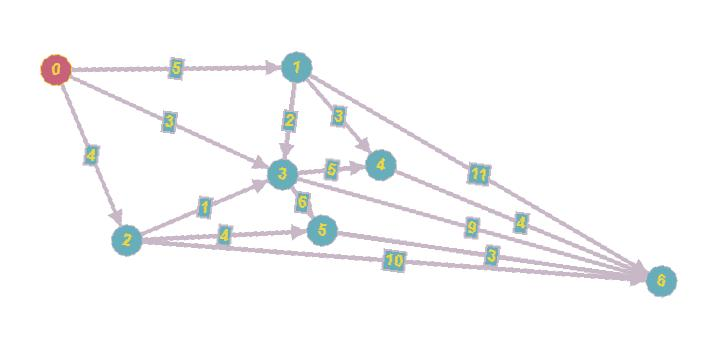

#### Solución original (Las mejoras han sido realizadas en la Actividad Guiada 1)

*Consideramos una tabla TARIFAS(i,j) para almacenar todos los precios que nos ofrecen los embarcaderos.<br>
*Si no es posible ir desde i a j daremos un valor alto para garantizar que ese trayecto no se va a elegir en la ruta óptima(modelado habitual para restricciones)

In [2]:
#Viaje por el rio - Programación dinámica
################################################################################

TARIFAS = [
[0,5,4,3,float("inf"),999,999],   #desde nodo 0
[999,0,999,2,3,999,11],  #desde nodo 1
[999,999, 0,1,999,4,10], #desde nodo 2
[999,999,999, 0,5,6,9],
[999,999, 999,999,0,999,4],
[999,999, 999,999,999,0,3],
[999,999,999,999,999,999,0]
]

#999 se puede sustituir por float("inf") del modulo math
TARIFAS

[[0, 5, 4, 3, inf, 999, 999],
 [999, 0, 999, 2, 3, 999, 11],
 [999, 999, 0, 1, 999, 4, 10],
 [999, 999, 999, 0, 5, 6, 9],
 [999, 999, 999, 999, 0, 999, 4],
 [999, 999, 999, 999, 999, 0, 3],
 [999, 999, 999, 999, 999, 999, 0]]

In [3]:
#Calculo de la matriz de PRECIOS y RUTAS
#  PRECIOS - contiene la matriz del mejor precio para ir de un nodo a otro
#  RUTAS   - contiene los nodos intermedios para ir de un nodo a otro
################################################################
def Precios(TARIFAS):
################################################################
  #Total de Nodos
  N = len(TARIFAS[0])

  #Inicialización de la tabla de precios
  PRECIOS = [ [9999]*N for i in [9999]*N]  #n x n
  RUTA = [ [""]*N for i in [""]*N]

  #Se recorren todos los nodos con dos bucles(origen - destino)
  #  para ir construyendo la matriz de PRECIOS
  for i in range(N-1):
    for j in range(i+1, N):
      MIN = TARIFAS[i][j]
      RUTA[i][j] = i

      for k in range(i, j):
        if PRECIOS[i][k] + TARIFAS[k][j] < MIN:
            MIN = min(MIN, PRECIOS[i][k] + TARIFAS[k][j] )
            RUTA[i][j] = k
        PRECIOS[i][j] = MIN

  return PRECIOS,RUTA

In [4]:
PRECIOS,RUTA = Precios(TARIFAS)
#print(PRECIOS[0][6])

print("PRECIOS")
for i in range(len(TARIFAS)):
  print(PRECIOS[i])

print("\nRUTA")
for i in range(len(TARIFAS)):
  print(RUTA[i])

PRECIOS
[9999, 5, 4, 3, 8, 8, 11]
[9999, 9999, 999, 2, 3, 8, 7]
[9999, 9999, 9999, 1, 6, 4, 7]
[9999, 9999, 9999, 9999, 5, 6, 9]
[9999, 9999, 9999, 9999, 9999, 999, 4]
[9999, 9999, 9999, 9999, 9999, 9999, 3]
[9999, 9999, 9999, 9999, 9999, 9999, 9999]

RUTA
['', 0, 0, 0, 1, 2, 5]
['', '', 1, 1, 1, 3, 4]
['', '', '', 2, 3, 2, 5]
['', '', '', '', 3, 3, 3]
['', '', '', '', '', 4, 4]
['', '', '', '', '', '', 5]
['', '', '', '', '', '', '']


In [5]:
#Calculo de la ruta usando la matriz RUTA
def calcular_ruta(RUTA, desde, hasta):
  if desde == RUTA[desde][hasta]:
  #if desde == hasta:
    #print("Ir a :" + str(desde))
    return desde
  else:
    return str(calcular_ruta(RUTA, desde, RUTA[desde][hasta])) +  ',' + str(RUTA[desde][hasta])

print("\nLa ruta es:")
calcular_ruta(RUTA, 0,6)


La ruta es:


'0,2,5'

##Problema de Asignacion de tarea

#### Solución original

In [29]:
#Asignacion de tareas - Ramificación y Poda
################################################################################
#    T A R E A
#   A
#   G
#   E
#   N
#   T
#   E

COSTES=[[11,12,18,40],
        [14,15,13,22],
        [11,17,19,23],
        [17,14,20,28]]


In [30]:
#Calculo del valor de una solucion parcial
def valor(S,COSTES):
  VALOR = 0
  for i in range(len(S)):
    VALOR += COSTES[S[i]][i]
  return VALOR

valor((3,2,  ),COSTES)

34

In [31]:
#Coste inferior para soluciones parciales
#  (1,3,) Se asigna la tarea 1 al agente 0 y la tarea 3 al agente 1

def CI(S,COSTES):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]

  #Estimacion
  for i in range( len(S), len(COSTES)   ):
    VALOR += min( [ COSTES[j][i] for j in range(len(S), len(COSTES))  ])
  return VALOR

def CS(S,COSTES):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]

  #Estimacion
  for i in range( len(S), len(COSTES)   ):
    VALOR += max( [ COSTES[j][i] for j in range(len(S), len(COSTES))  ])
  return VALOR

CI((0,1),COSTES)

68

In [32]:
#Genera tantos hijos como como posibilidades haya para la siguiente elemento de la tupla
#(0,) -> (0,1), (0,2), (0,3)
def crear_hijos(NODO, N):
  HIJOS = []
  for i in range(N ):
    if i not in NODO:
      HIJOS.append({'s':NODO +(i,)    })
  return HIJOS

In [33]:
crear_hijos((0,) , 4)

[{'s': (0, 1)}, {'s': (0, 2)}, {'s': (0, 3)}]

In [11]:
def ramificacion_y_poda(COSTES):
#Construccion iterativa de soluciones(arbol). En cada etapa asignamos un agente(ramas).
#Nodos del grafo  { s:(1,2),CI:3,CS:5  }
  #print(COSTES)
  DIMENSION = len(COSTES)
  MEJOR_SOLUCION=tuple( i for i in range(len(COSTES)) )
  CotaSup = valor(MEJOR_SOLUCION,COSTES)
  #print("Cota Superior:", CotaSup)

  NODOS=[]
  NODOS.append({'s':(), 'ci':CI((),COSTES)    } )

  iteracion = 0

  while( len(NODOS) > 0):
    iteracion +=1

    nodo_prometedor = [ min(NODOS, key=lambda x:x['ci']) ][0]['s']
    #print("Nodo prometedor:", nodo_prometedor)

    #Ramificacion
    #Se generan los hijos
    HIJOS =[ {'s':x['s'], 'ci':CI(x['s'], COSTES)   } for x in crear_hijos(nodo_prometedor, DIMENSION) ]

    #Revisamos la cota superior y nos quedamos con la mejor solucion si llegamos a una solucion final
    NODO_FINAL = [x for x in HIJOS if len(x['s']) == DIMENSION  ]
    if len(NODO_FINAL ) >0:
      #print("\n********Soluciones:",  [x for x in HIJOS if len(x['s']) == DIMENSION  ] )
      if NODO_FINAL[0]['ci'] < CotaSup:
        CotaSup = NODO_FINAL[0]['ci']
        MEJOR_SOLUCION = NODO_FINAL

    #Poda
    HIJOS = [x for x in HIJOS if x['ci'] < CotaSup   ]

    #Añadimos los hijos
    NODOS.extend(HIJOS)

    #Eliminamos el nodo ramificado
    NODOS =  [  x for x in NODOS if x['s'] != nodo_prometedor    ]

  print("La solucion final es:" ,MEJOR_SOLUCION , " en " , iteracion , " iteraciones" , " para dimension: " ,DIMENSION  )



ramificacion_y_poda(COSTES)

La solucion final es: [{'s': (1, 2, 0, 3), 'ci': 64}]  en  10  iteraciones  para dimension:  4


#### Solucion Fuerza Bruta vs. Solución Ramificación y Poda


In [90]:
import itertools
import time
from math import factorial

COSTES=[[11,12,18,40],
        [14,15,13,22],
        [11,17,19,23],
        [17,14,20,28]]

def valor_corregido(S, COSTES):
    VALOR = 0
    for i in range(len(S)):
        VALOR += COSTES[i][S[i]]
    return VALOR

valor_corregido((3,2,  ),COSTES) # 40 + 13 + 0 + 0 = 53

53

In [60]:
def fuerza_bruta(COSTES):
    print("="*60)
    print("ALGORITMO DE FUERZA BRUTA")
    print("="*60)

    n = len(COSTES)
    tareas = list(range(n))

    # Análisis combinatorio
    total_permutaciones = factorial(n)
    print(f"Dimensión del problema: {n}x{n}")
    print(f"Total de permutaciones a evaluar: {total_permutaciones} = {n}!")
    print()

    start_time = time.time()

    mejor_solucion = None
    mejor_coste = float('inf')
    evaluaciones = 0

    print("Evaluando todas las permutaciones:")
    print("-" * 40)

    for permutacion in itertools.permutations(tareas):
        coste = valor_corregido(permutacion, COSTES)
        evaluaciones += 1

        print(f"Permutación {evaluaciones:2d}: {permutacion} -> Coste: {coste}")

        if coste < mejor_coste:
            mejor_coste = coste
            mejor_solucion = permutacion
            print(f"    *** NUEVA MEJOR SOLUCIÓN: {mejor_solucion} (coste: {mejor_coste}) ***")

    end_time = time.time()
    tiempo_total = end_time - start_time

    print()
    print("="*60)
    print("RESULTADO FUERZA BRUTA")
    print("="*60)
    print(f"Mejor solución: {mejor_solucion}")
    print(f"Coste óptimo: {mejor_coste}")
    print(f"Permutaciones evaluadas: {evaluaciones}")
    print(f"Tiempo de ejecución: {tiempo_total:.6f} segundos")
    print()

    return mejor_solucion, mejor_coste, evaluaciones, tiempo_total

In [61]:
def ramificacion_y_poda_mejorada(COSTES):
    """Ramificación y poda con contador de nodos evaluados"""
    print("="*60)
    print("ALGORITMO DE RAMIFICACIÓN Y PODA")
    print("="*60)

    start_time = time.time()

    DIMENSION = len(COSTES)
    MEJOR_SOLUCION = tuple(i for i in range(len(COSTES)))
    CotaSup = valor_corregido(MEJOR_SOLUCION, COSTES)

    print(f"Solución inicial: {MEJOR_SOLUCION}")
    print(f"Cota Superior inicial: {CotaSup}")
    print()

    NODOS = []
    NODOS.append({'s': (), 'ci': CI((), COSTES)})

    iteracion = 0
    nodos_evaluados = 0
    nodos_podados = 0

    while len(NODOS) > 0:
        iteracion += 1
        nodo_prometedor = [min(NODOS, key=lambda x: x['ci'])][0]['s']
        nodos_evaluados += 1
        HIJOS = [{'s': x['s'], 'ci': CI(x['s'], COSTES)} for x in crear_hijos(nodo_prometedor, DIMENSION)]
        # Revisamos la cota superior
        NODO_FINAL = [x for x in HIJOS if len(x['s']) == DIMENSION]
        if len(NODO_FINAL) > 0:
            if NODO_FINAL[0]['ci'] < CotaSup:
                CotaSup = NODO_FINAL[0]['ci']
                MEJOR_SOLUCION = NODO_FINAL[0]['s']
        # Poda
        hijos_antes_poda = len(HIJOS)
        HIJOS = [x for x in HIJOS if x['ci'] < CotaSup]
        nodos_podados += (hijos_antes_poda - len(HIJOS))
        # Añadimos los hijos
        NODOS.extend(HIJOS)
        # Eliminamos el nodo ramificado
        NODOS = [x for x in NODOS if x['s'] != nodo_prometedor]

    end_time = time.time()
    tiempo_total = end_time - start_time

    print("="*60)
    print("RESULTADO RAMIFICACIÓN Y PODA")
    print("="*60)
    print(f"Mejor solución: {MEJOR_SOLUCION}")
    print(f"Coste óptimo: {CotaSup}")
    print(f"Iteraciones: {iteracion}")
    print(f"Nodos evaluados: {nodos_evaluados}")
    print(f"Nodos podados: {nodos_podados}")
    print(f"Tiempo de ejecución: {tiempo_total:.6f} segundos")
    print()

    return MEJOR_SOLUCION, CotaSup, nodos_evaluados, tiempo_total

In [80]:
def comparar_algoritmos():
    """Compara ambos algoritmos"""
    print("EJECUTANDO AMBOS ALGORITMOS...\n")

    # Ejecutar fuerza bruta
    sol_fb, coste_fb, eval_fb, tiempo_fb = fuerza_bruta(COSTES)

    # Ejecutar ramificación y poda
    sol_ryp, coste_ryp, eval_ryp, tiempo_ryp = ramificacion_y_poda_mejorada(COSTES)

    # Comparación
    print("="*80)
    print("COMPARACIÓN DE ALGORITMOS")
    print("="*80)
    print(f"{'Métrica':<25} {'Fuerza Bruta':<20} {'Ramificación y Poda':<20} {'Mejora':<15}")
    print("-" * 80)
    print(f"{'Solución':<25} {str(sol_fb):<20} {str(sol_ryp):<20} {'✓' if sol_fb == sol_ryp else '✗':<15}")
    print(f"{'Coste óptimo':<25} {coste_fb:<20} {coste_ryp:<20} {'✓' if coste_fb == coste_ryp else '✗':<15}")
    print(f"{'Nodos evaluados':<25} {eval_fb:<20} {eval_ryp:<20} {f'{eval_fb/eval_ryp:.1f}x menos':<15}")
    print(f"{'Tiempo (segundos)':<25} {tiempo_fb:.6f}s{'':<12} {tiempo_ryp:.6f}s{'':<12} {f'{tiempo_fb/tiempo_ryp:.1f}x más rápido' if tiempo_ryp > 0 else 'N/A':<15}")

#### Datos de prueba con soluciones conocidas
Se utilizan estos datos para evaluar el correcto funcionamiento dado que se detectó un error en el método valor()

In [81]:
COSTES = [
    [1, 10, 10, 10],
    [10, 2, 10, 10],
    [10, 10, 3, 10],
    [10, 10, 10, 4]
]
comparar_algoritmos() # Coste óptimo = 1 + 2 + 3 + 4 = 10

EJECUTANDO AMBOS ALGORITMOS...

ALGORITMO DE FUERZA BRUTA
Dimensión del problema: 4x4
Total de permutaciones a evaluar: 24 = 4!

Evaluando todas las permutaciones:
----------------------------------------
Permutación  1: (0, 1, 2, 3) -> Coste: 10
    *** NUEVA MEJOR SOLUCIÓN: (0, 1, 2, 3) (coste: 10) ***
Permutación  2: (0, 1, 3, 2) -> Coste: 23
Permutación  3: (0, 2, 1, 3) -> Coste: 25
Permutación  4: (0, 2, 3, 1) -> Coste: 31
Permutación  5: (0, 3, 1, 2) -> Coste: 31
Permutación  6: (0, 3, 2, 1) -> Coste: 24
Permutación  7: (1, 0, 2, 3) -> Coste: 27
Permutación  8: (1, 0, 3, 2) -> Coste: 40
Permutación  9: (1, 2, 0, 3) -> Coste: 34
Permutación 10: (1, 2, 3, 0) -> Coste: 40
Permutación 11: (1, 3, 0, 2) -> Coste: 40
Permutación 12: (1, 3, 2, 0) -> Coste: 33
Permutación 13: (2, 0, 1, 3) -> Coste: 34
Permutación 14: (2, 0, 3, 1) -> Coste: 40
Permutación 15: (2, 1, 0, 3) -> Coste: 26
Permutación 16: (2, 1, 3, 0) -> Coste: 32
Permutación 17: (2, 3, 0, 1) -> Coste: 40
Permutación 18: (2, 3,

In [82]:
COSTES = [
    [100, 1, 100],
    [100, 100, 2],
    [3, 100, 100]
]
comparar_algoritmos() # Coste óptimo = 1 + 2 + 3 = 6

EJECUTANDO AMBOS ALGORITMOS...

ALGORITMO DE FUERZA BRUTA
Dimensión del problema: 3x3
Total de permutaciones a evaluar: 6 = 3!

Evaluando todas las permutaciones:
----------------------------------------
Permutación  1: (0, 1, 2) -> Coste: 300
    *** NUEVA MEJOR SOLUCIÓN: (0, 1, 2) (coste: 300) ***
Permutación  2: (0, 2, 1) -> Coste: 202
    *** NUEVA MEJOR SOLUCIÓN: (0, 2, 1) (coste: 202) ***
Permutación  3: (1, 0, 2) -> Coste: 201
    *** NUEVA MEJOR SOLUCIÓN: (1, 0, 2) (coste: 201) ***
Permutación  4: (1, 2, 0) -> Coste: 6
    *** NUEVA MEJOR SOLUCIÓN: (1, 2, 0) (coste: 6) ***
Permutación  5: (2, 0, 1) -> Coste: 300
Permutación  6: (2, 1, 0) -> Coste: 203

RESULTADO FUERZA BRUTA
Mejor solución: (1, 2, 0)
Coste óptimo: 6
Permutaciones evaluadas: 6
Tiempo de ejecución: 0.000067 segundos

ALGORITMO DE RAMIFICACIÓN Y PODA
Solución inicial: (0, 1, 2)
Cota Superior inicial: 300

RESULTADO RAMIFICACIÓN Y PODA
Mejor solución: (1, 2, 0)
Coste óptimo: 6
Iteraciones: 6
Nodos evaluados: 6
Nodo

#### Datos originales

In [83]:
COSTES = [[11,12,18,40],
          [14,15,13,22],
          [11,17,19,23],
          [17,14,20,28]]
comparar_algoritmos() # Coste óptimo = 11 + 13 + 23 + 14 = 61

EJECUTANDO AMBOS ALGORITMOS...

ALGORITMO DE FUERZA BRUTA
Dimensión del problema: 4x4
Total de permutaciones a evaluar: 24 = 4!

Evaluando todas las permutaciones:
----------------------------------------
Permutación  1: (0, 1, 2, 3) -> Coste: 73
    *** NUEVA MEJOR SOLUCIÓN: (0, 1, 2, 3) (coste: 73) ***
Permutación  2: (0, 1, 3, 2) -> Coste: 69
    *** NUEVA MEJOR SOLUCIÓN: (0, 1, 3, 2) (coste: 69) ***
Permutación  3: (0, 2, 1, 3) -> Coste: 69
Permutación  4: (0, 2, 3, 1) -> Coste: 61
    *** NUEVA MEJOR SOLUCIÓN: (0, 2, 3, 1) (coste: 61) ***
Permutación  5: (0, 3, 1, 2) -> Coste: 70
Permutación  6: (0, 3, 2, 1) -> Coste: 66
Permutación  7: (1, 0, 2, 3) -> Coste: 73
Permutación  8: (1, 0, 3, 2) -> Coste: 69
Permutación  9: (1, 2, 0, 3) -> Coste: 64
Permutación 10: (1, 2, 3, 0) -> Coste: 65
Permutación 11: (1, 3, 0, 2) -> Coste: 65
Permutación 12: (1, 3, 2, 0) -> Coste: 70
Permutación 13: (2, 0, 1, 3) -> Coste: 77
Permutación 14: (2, 0, 3, 1) -> Coste: 69
Permutación 15: (2, 1, 0, 3) -

#### Datos con matriz mas grande

In [84]:
COSTES = [
    [14, 25, 31, 18, 22, 29],
    [23, 17, 26, 35, 19, 24],
    [16, 28, 20, 27, 33, 21],
    [32, 15, 23, 30, 25, 18],
    [19, 34, 22, 16, 28, 26],
    [27, 21, 35, 24, 17, 30]
]
comparar_algoritmos() # Coste óptimo = 14 + 17 + 20 + 18 + 16 + 17 = 102

EJECUTANDO AMBOS ALGORITMOS...

ALGORITMO DE FUERZA BRUTA
Dimensión del problema: 6x6
Total de permutaciones a evaluar: 720 = 6!

Evaluando todas las permutaciones:
----------------------------------------
Permutación  1: (0, 1, 2, 3, 4, 5) -> Coste: 139
    *** NUEVA MEJOR SOLUCIÓN: (0, 1, 2, 3, 4, 5) (coste: 139) ***
Permutación  2: (0, 1, 2, 3, 5, 4) -> Coste: 124
    *** NUEVA MEJOR SOLUCIÓN: (0, 1, 2, 3, 5, 4) (coste: 124) ***
Permutación  3: (0, 1, 2, 4, 3, 5) -> Coste: 122
    *** NUEVA MEJOR SOLUCIÓN: (0, 1, 2, 4, 3, 5) (coste: 122) ***
Permutación  4: (0, 1, 2, 4, 5, 3) -> Coste: 126
Permutación  5: (0, 1, 2, 5, 3, 4) -> Coste: 102
    *** NUEVA MEJOR SOLUCIÓN: (0, 1, 2, 5, 3, 4) (coste: 102) ***
Permutación  6: (0, 1, 2, 5, 4, 3) -> Coste: 121
Permutación  7: (0, 1, 3, 2, 4, 5) -> Coste: 139
Permutación  8: (0, 1, 3, 2, 5, 4) -> Coste: 124
Permutación  9: (0, 1, 3, 4, 2, 5) -> Coste: 135
Permutación 10: (0, 1, 3, 4, 5, 2) -> Coste: 144
Permutación 11: (0, 1, 3, 5, 2, 4) -> Co

##Descenso del gradiente

In [12]:
import math                      #Funciones matematicas
import matplotlib.pyplot as plt  #Generacion de gráficos (otra opcion seaborn)
import numpy as np               #Tratamiento matriz N-dimensionales y otras (fundamental!)
#import scipy as sc

import random

Vamos a buscar el minimo de la funcion paraboloide : $$f(x) =  x² + y²$$

Obviamente se encuentra en (x,y)=(0,0) pero probaremos como llegamos a él a través del descenso del gradiante.

In [95]:
#Definimos la funcion
#Paraboloide
f  = lambda X:      X[0]**2 + X[1]**2    #Funcion
df = lambda X: [2*X[0] , 2*X[1]]         #Gradiente

df([1,2])

[2, 4]

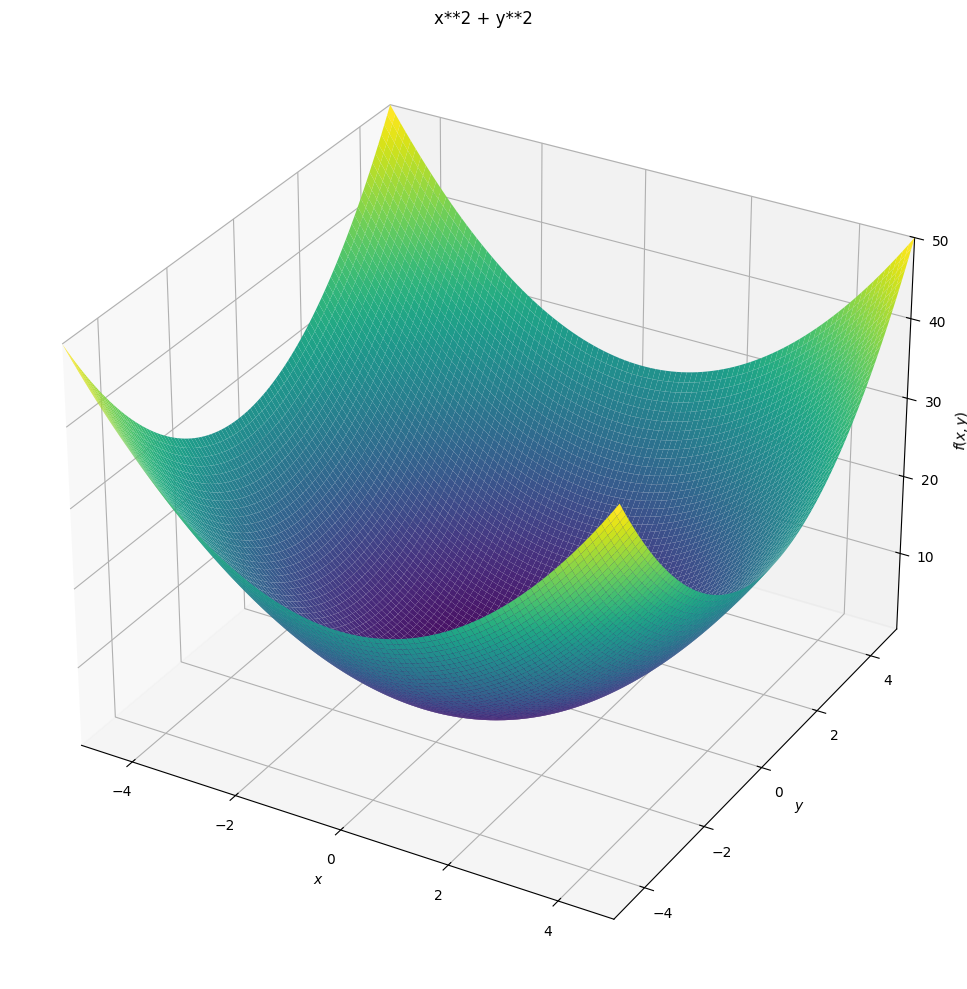

In [96]:
from sympy import symbols
from sympy.plotting import plot
from sympy.plotting import plot3d
x,y = symbols('x y')
plot3d(x**2 + y**2,
       (x,-5,5),(y,-5,5),
       title='x**2 + y**2',
       size=(10,10))

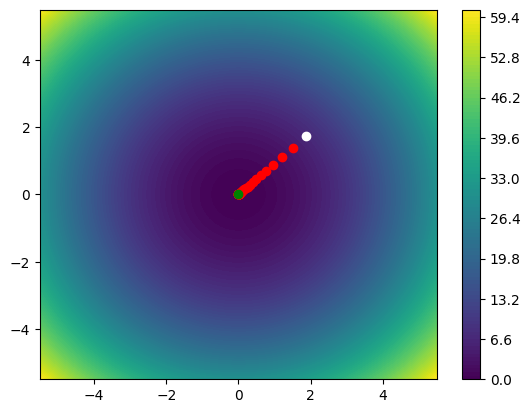

Solucion: [2.672001318293182e-05, 2.479955036192593e-05] 1.3289768026497506e-09


In [97]:
#Prepara los datos para dibujar mapa de niveles de Z
resolucion = 100
rango=5.5

X=np.linspace(-rango,rango,resolucion)
Y=np.linspace(-rango,rango,resolucion)
Z=np.zeros((resolucion,resolucion))
for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f([x,y])

#Pinta el mapa de niveles de Z
plt.contourf(X,Y,Z,resolucion)
plt.colorbar()

#Generamos un punto aleatorio inicial y pintamos de blanco
P=[random.uniform(-5,5  ),random.uniform(-5,5 ) ]
plt.plot(P[0],P[1],"o",c="white")

#Tasa de aprendizaje. Fija. Sería más efectivo reducirlo a medida que nos acercamos.
TA=.1

#Iteraciones:50
for _ in range(50):
  grad = df(P)
  #print(P,grad)
  P[0],P[1] = P[0] - TA*grad[0] , P[1] - TA*grad[1]
  plt.plot(P[0],P[1],"o",c="red")

#Dibujamos el punto final y pintamos de verde
plt.plot(P[0],P[1],"o",c="green")
plt.show()
print("Solucion:" , P , f(P))


**¿Te atreves a optimizar la función?:**

$$f(x)=sin(1/2 * x^2 - 1/4 * y^2 + 3) * cos(2*x + 1 - e^y)$$
<br>
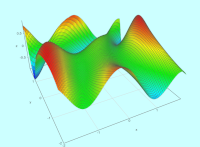


In [98]:
#Definimos la funcion
f= lambda X: math.sin(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) *math.cos(2*X[0] + 1 - math.exp(X[1]) )


In [100]:
# Función original
def f(X):
    x, y = X
    A = 0.5 * x**2 - 0.25 * y**2 + 3
    B = 2 * x + 1 - math.exp(y)
    return math.sin(A) * math.cos(B)

# Gradiente analítico
def df(X):
    x, y = X
    A = 0.5 * x**2 - 0.25 * y**2 + 3
    B = 2 * x + 1 - math.exp(y)

    df_dx = math.cos(A) * x * math.cos(B) - math.sin(A) * 2 * math.sin(B)
    df_dy = -0.5 * y * math.cos(A) * math.cos(B) + math.exp(y) * math.sin(A) * math.sin(B)

    return [df_dx, df_dy]

# Gradiente numérico aproximado (diferencias finitas centradas)
def numerical_gradient(f, X, h=1e-6):
    grad = []
    for i in range(len(X)):
        X_forward = X[:]
        X_backward = X[:]
        X_forward[i] += h
        X_backward[i] -= h
        df_i = (f(X_forward) - f(X_backward)) / (2 * h)
        grad.append(df_i)
    return grad

# Lista de puntos de prueba
test_points = [
    [1.0, 2.0],
    [0.0, 0.0],
    [-1.5, 0.5],
    [2.0, -1.0],
    [0.1, 0.2]
]

# Comparación
for X in test_points:
    grad_sym = df(X)
    grad_num = numerical_gradient(f, X)
    match = np.allclose(grad_sym, grad_num, rtol=1e-4)

    print(f"X = {X}")
    print(f"  Gradiente simbólico : {grad_sym}")
    print(f"  Gradiente numérico  : {grad_num}")
    print(f"  Coinciden: {match}\n")

X = [1.0, 2.0]
  Gradiente simbólico : [-0.8803745550791662, 3.9384502467765357]
  Gradiente numérico  : [-0.8803745551871911, 3.938450246807057]
  Coinciden: True

X = [0.0, 0.0]
  Gradiente simbólico : [-0.0, 0.0]
  Gradiente numérico  : [0.0, 0.0]
  Coinciden: True

X = [-1.5, 0.5]
  Gradiente simbólico : [-0.020080876476765264, -0.769740043873824]
  Gradiente numérico  : [-0.020080876406147752, -0.769740043815581]
  Coinciden: True

X = [2.0, -1.0]
  Gradiente simbólico : [-1.9981806219712952, 0.3649281067436956]
  Gradiente numérico  : [-1.9981806222424403, 0.36492810670529785]
  Coinciden: True

X = [0.1, 0.2]
  Gradiente simbólico : [-0.09265274830936433, 0.09508666149482652]
  Gradiente numérico  : [-0.09265274836245396, 0.09508666155844114]
  Coinciden: True



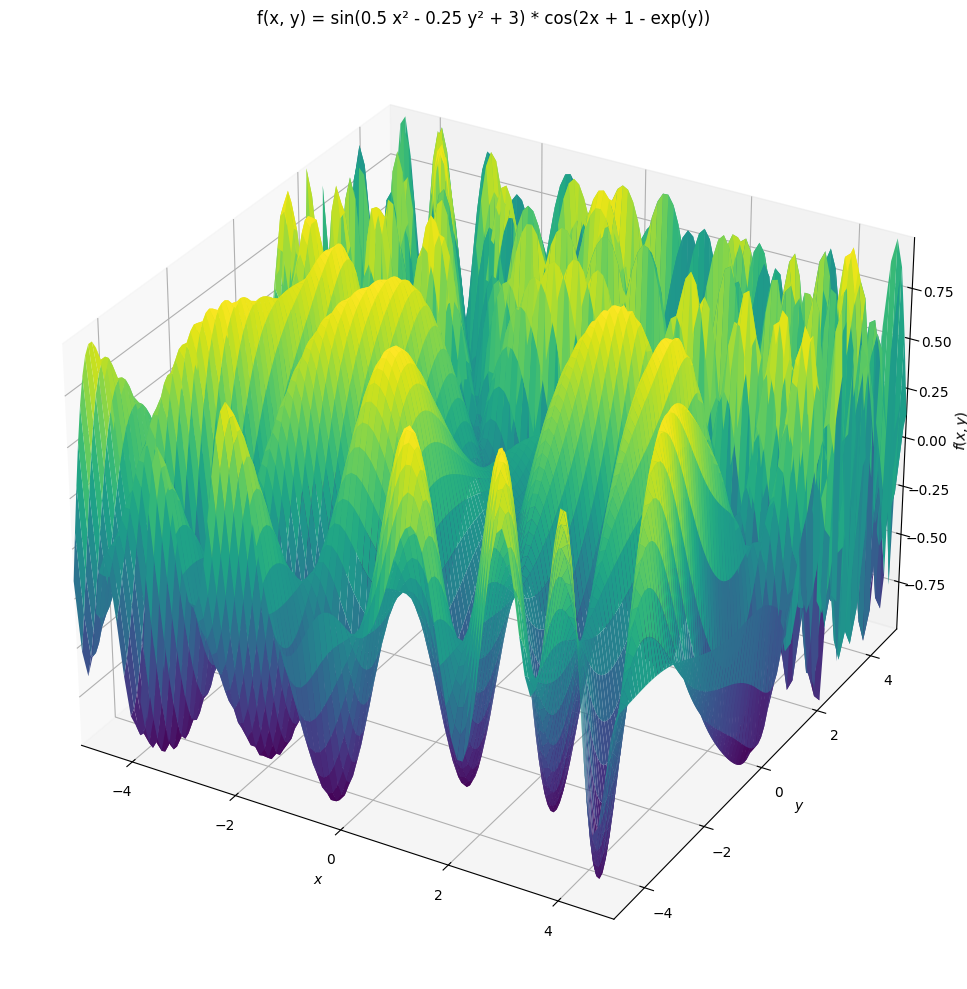

In [107]:
from sympy import sin, cos, exp
from sympy import symbols
from sympy.plotting import plot
from sympy.plotting import plot3d

x, y = symbols('x y')
fxy = sin(0.5 * x**2 - 0.25 * y**2 + 3) * cos(2*x + 1 - exp(y))
plot3d(
    fxy,
    (x, -5, 5),
    (y, -5, 5),
    title='f(x, y) = sin(0.5 x² - 0.25 y² + 3) * cos(2x + 1 - exp(y))',
    size=(10, 10)
)

Punto inicial aleatorio:
P = [1.3635836904416951, -4.564778466408522]
f(P) = 0.8037834498992614


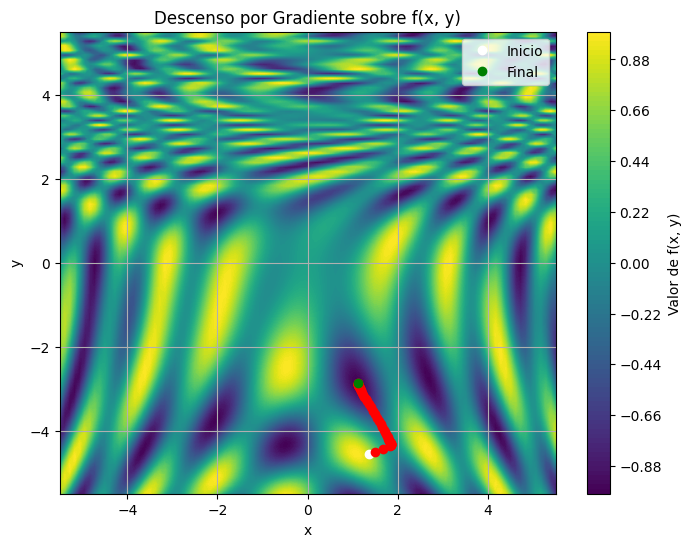

Solución encontrada:
P = [1.1083783966747485, -2.87430746610355]
f(P) = -0.9995840156410994


In [151]:
# Configuración del mapa de niveles
resolucion = 100
rango=5.5
X=np.linspace(-rango,rango,resolucion)
Y=np.linspace(-rango,rango,resolucion)
Z=np.zeros((resolucion,resolucion))

# Evaluar la función en cada punto de la grilla
for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f([x,y])

# Dibujar el mapa de niveles
plt.figure(figsize=(8, 6))
plt.contourf(X_vals, Y_vals, Z, levels=resolucion, cmap='viridis')
plt.colorbar(label="Valor de f(x, y)")

# Punto inicial aleatorio
P=[random.uniform(-5,5  ),random.uniform(-5,5 ) ]
plt.plot(P[0], P[1], "o", c="white", label="Inicio")
print("Punto inicial aleatorio:")
print("P =", P)
print("f(P) =", f(P))

#Tasa de aprendizaje. Fija. Sería más efectivo reducirlo a medida que nos acercamos.
TA=.1

# Descenso por gradiente
for _ in range(50):
  grad = df(P)
  #print(P,grad)
  P[0],P[1] = P[0] - TA*grad[0] , P[1] - TA*grad[1]
  plt.plot(P[0],P[1],"o",c="red")

# Punto final
plt.plot(P[0], P[1], "o", c="green", label="Final")
plt.legend()
plt.title("Descenso por Gradiente sobre f(x, y)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

# Mostrar resultado final
print("Solución encontrada:")
print("P =", P)
print("f(P) =", f(P))

Punto inicial aleatorio:
P = [-2.7271989037952338, 0.4906051984967883]
f(P) = 0.3597056096789232


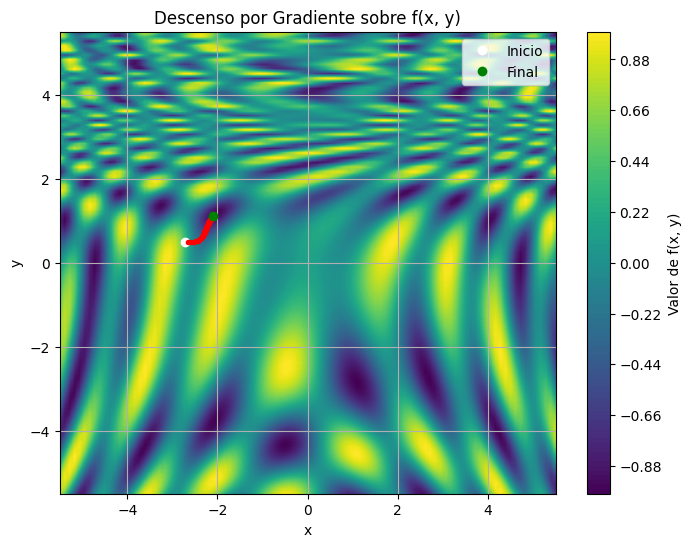

Solución encontrada:
P = [np.float64(-2.0967115612967078), np.float64(1.1082918040339726)]
f(P) = -0.9822821278891005


In [153]:
# Configuración del mapa de niveles
resolucion = 100
rango = 5.5
X_vals = np.linspace(-rango, rango, resolucion)
Y_vals = np.linspace(-rango, rango, resolucion)
Z = np.zeros((resolucion, resolucion))

# Evaluar la función en cada punto de la grilla
for ix, x in enumerate(X_vals):
    for iy, y in enumerate(Y_vals):
        Z[iy, ix] = f([x, y])

# Dibujar el mapa de niveles
plt.figure(figsize=(8, 6))
plt.contourf(X_vals, Y_vals, Z, levels=resolucion, cmap='viridis')
plt.colorbar(label="Valor de f(x, y)")

# Punto inicial aleatorio
P = [random.uniform(-5, 5), random.uniform(-5, 5)]
plt.plot(P[0], P[1], "o", c="white", label="Inicio")
print("Punto inicial aleatorio:")
print("P =", P)
print("f(P) =", f(P))

# Parámetros del descenso
TA0 = 0.1       # tasa de aprendizaje inicial
max_iter = 50   # número máximo de iteraciones
umbral = 1e-3   # condición de parada (gradiente pequeño)

# Descenso por gradiente
for i in range(max_iter):
    grad = df(P)
    grad_mag = np.linalg.norm(grad)
    if grad_mag < umbral:
        print(f"Convergencia en iteración {i}")
        break
    # Tasa adaptativa y decreciente
    TA = TA0 / ((1 + grad_mag) * (1 + 0.1 * i))
    P[0] -= TA * grad[0]
    P[1] -= TA * grad[1]
    plt.plot(P[0], P[1], "o", c="red", markersize=3)

# Punto final
plt.plot(P[0], P[1], "o", c="green", label="Final")
plt.legend()
plt.title("Descenso por Gradiente sobre f(x, y)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

# Mostrar resultado final
print("Solución encontrada:")
print("P =", P)
print("f(P) =", f(P))